### Titanic: Machine Learning from Disaster is a contest offered by the Kaggle site , where each participant must predict passenger survival or death through different variables such as age, gender or class

 ## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re as re

## Reading Datasets

In [3]:
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
full_data=[train,test]

Key             Definition

survival	    Survival	0 = No, 1 = Yes

pclass	        Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	                  Sex	

Age	             Age in years	

sibsp	        # of siblings / spouses aboard the Titanic	

parch	        # of parents / children aboard the Titanic	

ticket	        Ticket number	

fare	        Passenger fare	

cabin	        Cabin number	

embarked	    Port of Embarkation

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We have null entries in  Age, Cabin and Embarked, we'll have to impute these later

## EDA

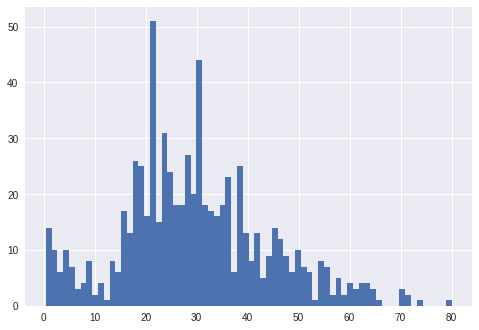

In [10]:
train['Age'].hist(bins=70)

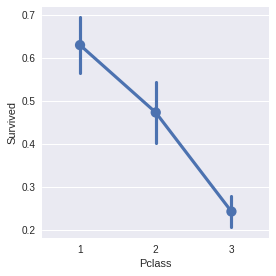

In [12]:
sns.factorplot('Pclass','Survived',data=train)

## Creating/Extracting Features

### Function for getting Title from name

In [14]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

### Dropping PassengerId and Name

In [15]:
train.drop(['PassengerId','Name'],axis=1,inplace=True)

In [16]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

### Categorizing title in 5 categories

In [17]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

### Imputing missing values of Age with median of respective title

In [18]:
for dataset in full_data:
    for title in ['Mr','Mrs','Miss','Master','Rare']:
        mask1= dataset['Title']==title
        mask2= dataset['Age'].isnull()
        indices=dataset[mask1][mask2].index
        for i in indices:
            dataset['Age'][i]=(train[train['Title']==title])['Age'].median()

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/harshitssj4/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
test.drop(['Name'],axis=1,inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Title       891 non-null object
is_child    891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Creating new feature is_child for Age less than 15

In [23]:
for dataset in full_data:
    dataset['is_child']=0
    dataset.loc[dataset['Age']<=14,'is_child']=1

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,is_child
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


### Creating more new features from SibSp and Parch

In [25]:
for dataset in full_data:
    dataset['family_size']=dataset['SibSp']+dataset['Parch']+1

In [26]:
for dataset in full_data:
    dataset['is_alone']=0
    dataset.loc[dataset['family_size']==1,'is_alone']=1

In [27]:
for dataset in full_data:
    dataset.drop(['SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,is_child,family_size,is_alone
0,0,3,male,22.0,7.2500,S,Mr,0,2,0
1,1,1,female,38.0,71.2833,C,Mrs,0,2,0
2,1,3,female,26.0,7.9250,S,Miss,0,1,1
3,1,1,female,35.0,53.1000,S,Mrs,0,2,0
4,0,3,male,35.0,8.0500,S,Mr,0,1,1


### Imputing Embarked with median value

In [29]:
for dataset in full_data:
    dataset['Embarked'].fillna('S',inplace=True)

### Changing Sex to nominal and OneHotEncoding(manually) on Embarked

In [31]:
dict={'male':1,'female':0}
train['Sex']=train['Sex'].map(dict)
test['Sex']=test['Sex'].map(dict)

In [30]:
a=pd.get_dummies(train[['Embarked','Title']])
b=pd.get_dummies(test[['Embarked','Title']])

In [33]:
train=train.join(a)
test=test.join(b)

In [34]:
train.drop(['Embarked','Title'],axis=1,inplace=True)
test.drop(['Embarked','Title'],axis=1,inplace=True)

In [35]:
train.head()

,Survived,Pclass,Sex,Age,Fare,is_child,family_size,is_alone,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,22.0,7.2500,0,2,0,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,0,2,0,1,0,0,0,0,0,1,0
2,1,3,0,26.0,7.9250,0,1,1,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,0,2,0,0,0,1,0,0,0,1,0
4,0,3,1,35.0,8.0500,0,1,1,0,0,1,0,0,1,0,0


### Categorizing Fare and Age

In [36]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train['CategoricalAge'] = pd.cut(train['Age'], 5)

In [37]:
cf=pd.get_dummies(train['CategoricalFare'])
ca=pd.get_dummies(train['CategoricalAge'])
cf.columns=['F1','F2','F3','F4']
ca.columns=['A','B','C','D','E']

In [38]:
train=train.join(ca)
train=train.join(cf)

In [31]:
train.drop(['Age','Fare','CategoricalAge','CategoricalFare'],axis=1,inplace=True)

In [39]:
test['CategoricalFare'] = pd.qcut(test['Fare'], 4)
test['CategoricalAge'] = pd.cut(test['Age'], 5)

In [40]:
cf=pd.get_dummies(test['CategoricalFare'])
ca=pd.get_dummies(test['CategoricalAge'])
cf.columns=['F1','F2','F3','F4']
ca.columns=['A','B','C','D','E']
test=test.join(ca)
test=test.join(cf)

In [41]:
test.drop(['Age','Fare','CategoricalAge','CategoricalFare'],axis=1,inplace=True)

In [42]:
train.head()

,Survived,Pclass,Sex,Age,Fare,is_child,family_size,is_alone,Embarked_C,Embarked_Q,...,CategoricalAge,A,B,C,D,E,F1,F2,F3,F4
0,0,3,1,22.0,7.2500,0,2,0,0,0,...,"(16.336, 32.252]",0,1,0,0,0,1,0,0,0
1,1,1,0,38.0,71.2833,0,2,0,1,0,...,"(32.252, 48.168]",0,0,1,0,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,1,0,0,...,"(16.336, 32.252]",0,1,0,0,0,0,1,0,0
3,1,1,0,35.0,53.1000,0,2,0,0,0,...,"(32.252, 48.168]",0,0,1,0,0,0,0,0,1
4,0,3,1,35.0,8.0500,0,1,1,0,0,...,"(32.252, 48.168]",0,0,1,0,0,0,1,0,0


## Modelling using Random Forest

In [43]:
X=train[['Pclass','Sex','is_child','family_size','is_alone','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rare',\
         'F1','F2','F3','F4','A','B','C','D','E']].values

In [44]:
y=train['Survived'].values

In [45]:
print X.shape, y.shape

(891, 22) (891,)


In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2)

In [47]:
print xtrain.shape,xtest.shape

(712, 22) (179, 22)


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
tune={'n_estimators':[6,7,8,9,10,11,12,13,14,15],'max_depth':np.arange(5,15,1),'min_samples_split':[2,3,4]}

In [50]:
from sklearn.grid_search import GridSearchCV
clf=RandomForestClassifier()
clf1=GridSearchCV(clf,param_grid=tune,cv=10,n_jobs=4)
clf1.fit(xtrain,ytrain)

/home/harshitssj4/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/harshitssj4/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_estimators': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 3, 4], 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [51]:
clf_new=clf1.best_estimator_

In [52]:
clf_new.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=11, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import accuracy_score
print accuracy_score(ytest,clf_new.predict(xtest))
print accuracy_score(ytrain,clf_new.predict(xtrain))

0.854748603352
0.825842696629


In [54]:
test.shape

(418, 23)

In [55]:
X_test=test[['Pclass','Sex','is_child','family_size','is_alone','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Rare',\
         'F1','F2','F3','F4','A','B','C','D','E']].values

In [56]:
clf_test=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=14, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
clf_test.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=14, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
y_pred=clf_test.predict(X_test)


In [59]:
subm=test['PassengerId']
subm=pd.DataFrame(subm)
subm['Survived']=y_pred

In [60]:
subm.shape

(418, 2)

In [100]:
subm.to_csv('submission.csv',sep=',')

### This submission scored 0.80861 LB score